# Practice Lab: Analyzing NBA games: Performance per game

You work a sports data consulting firm that provides insights to basketball teams, broadcasters, and sports media outlets. 

To complete the task you decide to analyze the NBA Boxscore Dataset, which includes 3 tables:

- **game_info**: contains information about each game between two teams, including things like the scores and the outcome.
- **team_stats**: contains detailed statistics for each team in each game, such as points scored, rebounds, assists, and more.
- **player_stats**: contains individual game stats for each player, including points, assists, rebounds, and other performance details.

**The database is extensive, so queries might take a bit longer to complete.**

## Data Schema
The next diagram shows the data schema. For simplicity, it only shows a subset of columns for each table.

<div style="text-align: center">
    <img src="imgsL3/NBA-db-relation.png" width=400>
</div>

For more details on each table, please take a look at the [🔗dataset explorer](https://www.kaggle.com/datasets/lukedip/nba-boxscore-dataset)

## General instructions
- **Replace any instances of `None` with your own code**. All `None`s must be replaced.
- **Compare your results with the expected output** shown below the code.
- **Check the solution** using the expandable cell to verify your answer. If needed, you can copy the code and paste it into the cell

Happy coding!

<div style="background-color: #FAD888; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
<strong>Important note</strong>: Code blocks with None will not run properly. If you run them before completing the exercise, you will likely get an error. 
</div>

## Table of Contents
- [Step 1: Import Modules](#import-modules)
- [Step 2: Connect to the Database](#connect-to-the-database)
- [Step 3: Laker's Performance](#lakers-performance)
- [Step 4: LeBron James Performance](#lebron-james-performance) 

<a id="import-modules"></a>

## Step 1: Import Modules
Begin by importing sqlite3 and pandas modules

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id="connect-to-the-database"></a>

## Step 2: Connect to the Database
Next, you need to establish a connection to the SQLite database to run queries and retrieve the data.

In [2]:
# Connect to the SQLite database
connection = sqlite3.connect("../NBA-Boxscore-Database.db")

# check the connection with a small query
query_first_line = """
SELECT team, MP as 'minutes played' 
FROM team_stats 
LIMIT 1
""" 
pd.read_sql_query(query_first_line, connection)

,team,minutes played
0,ORL,240


<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgsL3/conn_check.png" width="120">
</details>

<a id='lakers-performance'></a>

## Step 3: Lakers' Performance 

You need to analyze the Los Angeles Lakers' performance in the 2022-2023 season. You want to focus on some key metrics like points scored, field goal percentage, and turnovers.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">


**▶▶▶ Directions**
1. Write a SQLite query that:
   - Selects the `game_id` from the `game_info` table.
   - Selects `team`, `PTS` (with the alias `team_pts`), `FGp` (with the alias `field_goal_percentage`), and `TOV` (with the alias `turnovers`)  from the `team_stats` table.
   - Consider only games in the `2223` season, where the Los Angeles Lakers (LAL) played.

   **Hint:** You should consider an `INNER JOIN`, on the `game_id` column.

</div>

In [4]:
### START CODE HERE ###

# write the SQL query
query_lakers = """
SELECT game_info.game_id, 
       team_stats.team, 
       team_stats.PTS AS `team_pts`, 
       team_stats.FGp AS "field_goal_percentage", 
       team_stats.TOV AS "turnovers"
FROM team_stats 
INNER JOIN game_info ON team_stats .game_id = game_info.game_id
WHERE game_info.season = "2223" AND team_stats.team = "LAL";
"""

### END CODE HERE ###

# execute the query
df_lakers = pd.read_sql_query(query_lakers, connection)

# show the first 5 results
df_lakers.head()

,game_id,team,team_pts,field_goal_percentage,turnovers
0,222310180002,LAL,109.0,0.426,21.0
1,222310200016,LAL,97.0,0.351,10.0
2,222310230037,LAL,104.0,0.446,13.0
3,222310260064,LAL,99.0,0.444,14.0
4,222310280076,LAL,102.0,0.416,22.0


<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgsL3/lakers.png" width="350">

</details>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# write the SQL query
query_lakers = """
SELECT game_info.game_id, 
       team_stats.team, 
       team_stats.PTS As team_pts, 
       team_stats.FGp AS field_goal_percentage, 
       team_stats.TOV AS turnovers
FROM team_stats 
INNER JOIN game_info ON team_stats.game_id = game_info.game_id
WHERE game_info.season = "2223" AND team_stats.team = "LAL";
"""

```
</details>

With the extracted information you can visualize the correlation between points in a game vs. turnover using a scatterplot.

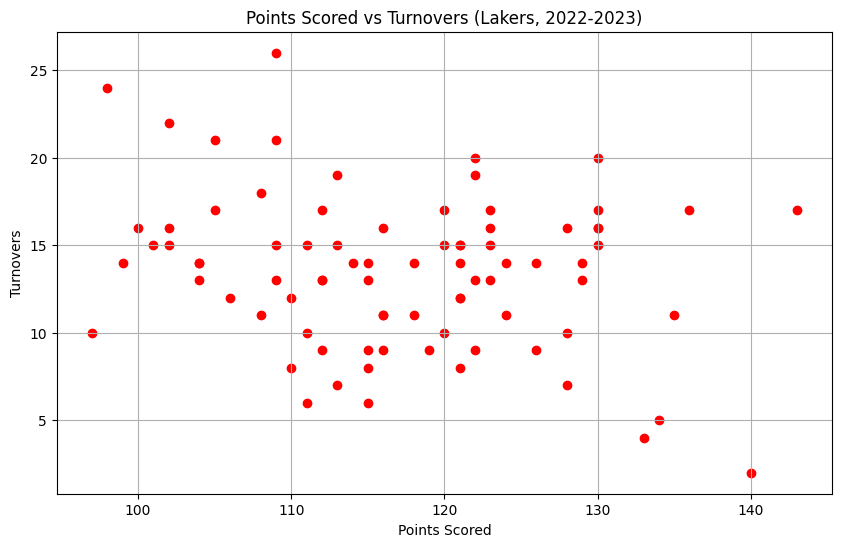

In [5]:
# create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df_lakers['team_pts'], df_lakers['turnovers'], color='r')

# add the title and labels
plt.title("Points Scored vs Turnovers (Lakers, 2022-2023)")
plt.xlabel("Points Scored")
plt.ylabel("Turnovers")
# add a grid
plt.grid(True)

Does it show a positive or negative correlation? Why do you think that is?

<a id="lebron-james-performance"></a>

## Step 4: LeBron James Performance

LeBron James was the star player in the Los Angeles Lakers (LAL) team during the 2022-2023 season. You want to find out how well he performed in each game, focusing on key stats like points scored (PTS) and player impact estimate (PIE).

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**
1. Write a SQLite query that:
   - Selects the `away_team`, `away_score`, `home_team`, and `home_score` from the `game_info` table.
   - Selects, the points scored (`PTS`) and Player Impact Estimate (`PIE`) of LeBron James from the `player_stats` table (whether he played or not).
   - Of all games played by the Los Angeles Lakers (`"LAL"`) (home team or away team).
   - Where the `season` is `"2223"`.
   
   **Hint:** You will need a LEFT JOIN to solve this query, since you want all the LAL games, not only the ones with LeBron James.

</div>

In [ ]:
#### START CODE HERE ###

# write the query
query_lebron = """
SELECT game_info.away_team, 
       game_info.away_score, 
       game_info.home_team, 
       game_info.home_score, 
       player_stats.PTS, 
       player_stats.PIE
FROM game_info
LEFT JOIN player_stats
    ON game_info.game_id = player_stats.game_id
WHERE (game_info.None = "LAL" OR game_info.None = "LAL") 
  AND game_info.season = "2223"
  AND player_stats.player = "LeBron James";
"""

### END CODE HERE ###

# execute the query
df_lebron = pd.read_sql_query(query_lebron, connection)

# show the first rows
df_lebron.head()

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgsL3/lebron.png" width="300">

</details>

<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# write the query
query_lebron = """
SELECT game_info.away_team, 
       game_info.away_score, 
       game_info.home_team, 
       game_info.home_score, 
       player_stats.PTS, 
       player_stats.PIE
FROM game_info
LEFT JOIN player_stats
    ON game_info.game_id = player_stats.game_id
WHERE (game_info.home_team = 'LAL' OR game_info.away_team = 'LAL') 
  AND game_info.season = '2223'
  AND player_stats.player = 'LeBron James';
"""

```
</details>

With this information you can answer questions like
1. How many games did LeBron James miss in the 2022-2023 season?
2. What was the percentage of won games, where LeBron James played?

Run the cell below to get the answers!

In [ ]:
# find number of missed games
missed_games = df_lebron['PTS'].isna().sum()

# find the percentage of won games, where LeBron played
## create a new column 'LAL_won' that checks if LAL won the game
df_lebron['LAL_won'] = ((df_lebron['home_team'] == 'LAL') & 
                     (df_lebron['home_score'] > df_lebron['away_score'])) | \
                    ((df_lebron['away_team'] == 'LAL') & 
                     (df_lebron['away_score'] > df_lebron['home_score']))

## filter out rows where LeBron didn't play (when PTS or PIE is NaN)
df_lebron_played = df_lebron.dropna(subset=['PTS', 'PIE'])

## calculate the percentage of games won by LAL
percentage_won = df_lebron_played['LAL_won'].mean() * 100

# print the results
print("LeBron missed", missed_games, "games in the 2022-2023 season.")
print("LAL won", percentage_won, "% of the games where LeBron played.")

Finally, run the next cell to close the connection.

In [ ]:
connection.close()

Congratulations for making it until the end of this lab. Hope you enjoyed it! 